$$\small \color{green}{\textbf{Validating the distributions in modelling the Volatilies of financial assets}}$$ 


$$\large \color{blue}{\textbf{Phuong Van Nguyen}}$$
$$\small \color{red}{\textbf{ phuong.nguyen@summer.barcelonagse.eu}}$$


This computer program was written by Phuong V. Nguyen, based on the $\textbf{Anacoda 1.9.7}$ and $\textbf{Python 3.7}$.

$$\text{1. Issue}$$
Once modelling the volatilities of financial assets, three distributions are typically used, including 

1. The normal distribution.
2. The Student’s T distribution.
3. The Standardized Skew Student’s T. 

It is worth noting that financial returns are typically heavy tailed, and a Student’s T distribution is a simple method to capture this feature. However, this mini project attempts to evaluate the fit of these three distributions in modelling the volatilities of financial asset. 

$$\text{2. Methodology}$$ 


To this end, I develop and estimate the Threshold ARCH (TARCH) Model using the daily closed price of the Vingroup stock.

$$\text{3. Dataset}$$ 

One can download the dataset used to replicate my project at my Repositories on the Github site below



# Preparing Problem

##  Loading Libraries

In [31]:
import warnings
import itertools
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
#import pmdarima as pm
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from arch import arch_model
from arch.univariate import GARCH
from collections import OrderedDict

## Defining some varibales for printing the result

In [2]:
Purple= '\033[95m'
Cyan= '\033[96m'
Darkcyan= '\033[36m'
Blue = '\033[94m'
Green = '\033[92m'
Yellow = '\033[93m'
Red = '\033[91m'
Bold = "\033[1m"
Reset = "\033[0;0m"
Underline= '\033[4m'
End = '\033[0m'

##  Loading Dataset

In [3]:
data = pd.read_excel("data.xlsx")


# Data Exploration and Preration

## Data exploration

In [4]:
data.head(5)

,DATE,CLOSE,TICKER,OPEN,HIGH,LOW,VOLUME
0,2007-09-19,125.0,VIC,125.0,125.0,125.0,307840
1,2007-09-20,131.0,VIC,131.0,131.0,130.0,794790
2,2007-09-21,137.0,VIC,137.0,137.0,135.0,1224660
3,2007-09-24,143.0,VIC,143.0,143.0,143.0,551130
4,2007-09-25,150.0,VIC,150.0,150.0,148.0,962110


## Computing returns
### Picking up the close prices

In [5]:
closePrice = data[['DATE','CLOSE']]
closePrice.head(5)

,DATE,CLOSE
0,2007-09-19,125.0
1,2007-09-20,131.0
2,2007-09-21,137.0
3,2007-09-24,143.0
4,2007-09-25,150.0


### Computing the daily returns

In [6]:
closePrice['Return'] = closePrice['CLOSE'].pct_change()
closePrice.head()

,DATE,CLOSE,Return
0,2007-09-19,125.0,NaN
1,2007-09-20,131.0,0.048000
2,2007-09-21,137.0,0.045802
3,2007-09-24,143.0,0.043796
4,2007-09-25,150.0,0.048951


In [7]:
daily_return=closePrice[['DATE','Return']]
daily_return.head()

,DATE,Return
0,2007-09-19,NaN
1,2007-09-20,0.048000
2,2007-09-21,0.045802
3,2007-09-24,0.043796
4,2007-09-25,0.048951


### Reseting index

In [8]:
daily_return =daily_return.set_index('DATE')
daily_return.head()

,Return
DATE,
2007-09-19,NaN
2007-09-20,0.048000
2007-09-21,0.045802
2007-09-24,0.043796
2007-09-25,0.048951


In [9]:
daily_return = 100 * daily_return.dropna()
daily_return.head()

,Return
DATE,
2007-09-20,4.800000
2007-09-21,4.580153
2007-09-24,4.379562
2007-09-25,4.895105
2007-09-26,4.666667


In [10]:
daily_return.index

DatetimeIndex(['2007-09-20', '2007-09-21', '2007-09-24', '2007-09-25',
               '2007-09-26', '2007-09-27', '2007-09-28', '2007-10-01',
               '2007-10-02', '2007-10-03',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='DATE', length=2315, freq=None)

### Plotting returns

Text(0.5, 0, 'Source: The Daily Close Price-based Calculations')

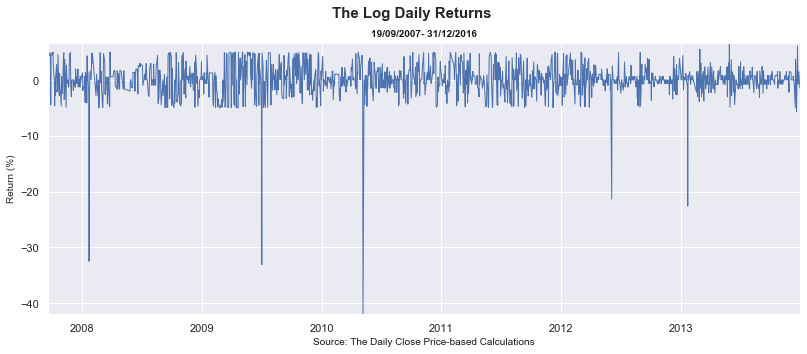

In [13]:
sns.set()
fig=plt.figure(figsize=(12,5))
plt.plot(daily_return.Return['2007':'2013'],LineWidth=1)
plt.autoscale(enable=True,axis='both',tight=True)
#plt.grid(linestyle=':',which='both',linewidth=2)
fig.suptitle('The Log Daily Returns', fontsize=15,fontweight='bold')
plt.title('19/09/2007- 31/12/2016',fontsize=10,fontweight='bold',color='k')
plt.ylabel('Return (%)',fontsize=10)
plt.xlabel('Source: The Daily Close Price-based Calculations',fontsize=10,fontweight='normal',color='k')

### Checking the Skewness and Kurtosis
#### Desriptive statistices

In [20]:
print('The Skewness: {}'.format(round(daily_return.Return.skew(),2)))
print('The Kurtosis: {}'.format(round(daily_return.Return.kurtosis(),2)))

The Skewness: -3.98
The Kurtosis: 48.69


#### Visualization

Text(0, 0.5, 'Percent (%)')

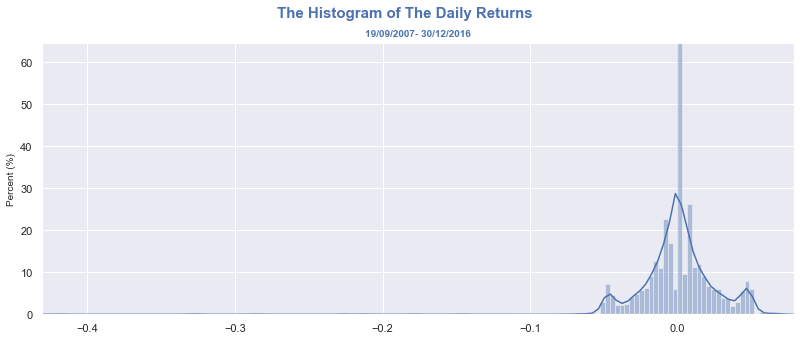

In [23]:
sns.set()
fig=plt.figure(figsize=(12,5))
sns.distplot(closePrice[['Return']],bins=150)
plt.autoscale(enable=True,axis='both',tight=True)
#plt.grid(linestyle=':',which='both',linewidth=2)
fig.suptitle('The Histogram of The Daily Returns', 
             fontsize=15,fontweight='bold',color='b')
plt.title('19/09/2007- 30/12/2016',fontsize=10,fontweight='bold',color='b')
plt.ylabel('Percent (%)',fontsize=10)
#plt.xlabel('Source: The Daily Close Price-based Calculations',fontsize=17,fontweight='normal',color='k')

$$\textbf{Comments:}$$

- First, the distribution of the return shows a negative (left) skewness.

- Second, the distribution of the return shows a positive kurtusis. Accordingly, the peak is stepper and/or the tails are much fatter.

It implies either the Student’s T distribution or the Standardized Skew Student’s T captures this fact.

# Modelling TARCH model

$$\text{Mean equation:}$$
$$r_{t}=\mu + \epsilon_{t}$$

$$\text{Conditional Volatility (Variance) equation:}$$
$$\sigma^{k}_{t}= \omega + \alpha |\epsilon_{t}|^{k} + \gamma |\epsilon_{t-1}|^{k} \mathbf{I}_{[\epsilon_{t-1}<0]}+\beta\sigma^{k}_{t-1}$$

$$\text{where:}$$


$$\epsilon_{t}= \sigma_{t} e_{t}$$

$$e_{t} \sim N(0,1)$$

$$\mathbf{I} $$ $$\text{is an indicator function that takes the value 1 when its argument is true}$$

### The normal distribution

In [43]:
tarch_norm= arch_model(daily_return, p=1, o=1, q=1, power=1.0, dist='normal')
results_norm = tarch_norm.fit(update_freq=1, disp='on')
print(results_norm.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5460.116705732606
Iteration:      2,   Func. Count:     17,   Neg. LLF: 5446.3901671632375
Iteration:      3,   Func. Count:     27,   Neg. LLF: 5441.466972298768
Iteration:      4,   Func. Count:     35,   Neg. LLF: 5429.544974822098
Iteration:      5,   Func. Count:     43,   Neg. LLF: 5412.3041879474
Iteration:      6,   Func. Count:     51,   Neg. LLF: 5407.901947533121
Iteration:      7,   Func. Count:     58,   Neg. LLF: 5399.665551467617
Iteration:      8,   Func. Count:     67,   Neg. LLF: 5397.515419627043
Iteration:      9,   Func. Count:     75,   Neg. LLF: 5390.998972851579
Iteration:     10,   Func. Count:     82,   Neg. LLF: 5390.6878024503
Iteration:     11,   Func. Count:     89,   Neg. LLF: 5390.6697709769105
Iteration:     12,   Func. Count:     96,   Neg. LLF: 5390.664950811897
Iteration:     13,   Func. Count:    103,   Neg. LLF: 5390.6647403081415
Iteration:     14,   Func. Count:    110,   Neg. LLF: 5390.664729

## The Standard Student’s T distribution

In [27]:
tarch_standT= arch_model(daily_return, p=1, o=1, q=1, power=1.0, dist='t')
results_standT = tarch_standT.fit(update_freq=1, disp='on')
print(results_standT.summary())

Iteration:      1,   Func. Count:      8,   Neg. LLF: 5046.832306108819
Iteration:      2,   Func. Count:     17,   Neg. LLF: 5027.548162620682
Iteration:      3,   Func. Count:     26,   Neg. LLF: 5022.114674417317
Iteration:      4,   Func. Count:     35,   Neg. LLF: 5011.943033247913
Iteration:      5,   Func. Count:     44,   Neg. LLF: 5003.353351771513
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4994.249781937767
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4987.816946405322
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4982.491211326451
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4975.776920541763
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4958.5434648569035
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4944.8034469347995
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4941.274510697079
Iteration:     13,   Func. Count:    114,   Neg. LLF: 4940.606017386575
Iteration:     14,   Func. Count:    123,   Neg. LLF: 4940.157

## The Standardized Skew Student’s T distribution

In [29]:
tarch_standST= arch_model(daily_return, p=1, o=1, q=1, power=1.0, dist='skewt')
results_standST = tarch_standST.fit(update_freq=1, disp='on')
print(results_standST.summary())

Iteration:      1,   Func. Count:      9,   Neg. LLF: 5046.832305603137
Iteration:      2,   Func. Count:     19,   Neg. LLF: 5043.160696933659
Iteration:      3,   Func. Count:     30,   Neg. LLF: 5036.786920087264
Iteration:      4,   Func. Count:     40,   Neg. LLF: 5014.609338367713
Iteration:      5,   Func. Count:     51,   Neg. LLF: 5012.971803763876
Iteration:      6,   Func. Count:     61,   Neg. LLF: 5009.555503679841
Iteration:      7,   Func. Count:     71,   Neg. LLF: 5003.173524968056
Iteration:      8,   Func. Count:     81,   Neg. LLF: 4994.930963474142
Iteration:      9,   Func. Count:     91,   Neg. LLF: 4987.740974394972
Iteration:     10,   Func. Count:    101,   Neg. LLF: 4981.770653736899
Iteration:     11,   Func. Count:    110,   Neg. LLF: 4947.014356888565
Iteration:     12,   Func. Count:    120,   Neg. LLF: 4943.655063179883
Iteration:     13,   Func. Count:    131,   Neg. LLF: 4943.4842670232265
Iteration:     14,   Func. Count:    141,   Neg. LLF: 4941.5372

# Comparing the Log-likelihood

In [42]:
lls = pd.Series(
    OrderedDict((('normal', results_norm.loglikelihood),
                 ('t', results_standT.loglikelihood), ('skewt',
                                              results_standST.loglikelihood))))
print('--------------------------------------')
print(Bold+'The optimal log-likelihood'+End)
print('--------------------------------------')
print(lls)
params = pd.DataFrame(
    OrderedDict((('normal', results_norm.params), ('t', results_standT.params),
                 ('skewt', results_standST.params))))
print('--------------------------------------')
print(Bold+'The parameters'+End)
print('--------------------------------------')
print(params)
print('--------------------------------------')

--------------------------------------
The optimal log-likelihood
--------------------------------------
normal   -5390.664730
t        -4939.546225
skewt    -4939.421874
dtype: float64
--------------------------------------
The parameters
--------------------------------------
            normal         t     skewt
alpha[1]  0.405908  0.229863  0.231345
beta[1]   0.363287  0.768766  0.767318
gamma[1]  0.255154  0.002743  0.002672
lambda         NaN       NaN -0.012086
mu       -0.092088 -0.018127 -0.027144
nu             NaN  4.197066  4.205417
omega     0.827809  0.159076  0.159671
--------------------------------------


$$\textbf{Comments:}$$

As analyzing before, we find that the normal has a much lower log-likelihood (-5390.66) than either the Standard Student’s T or the Standardized Skew Student’s T – however, these two are fairly close (-4939.55 and -4939.42, respectively). The closeness of the T and the Skew T indicate that returns are not heavily skewed.

# Comparing the residuals and conditional variances
## The residuals

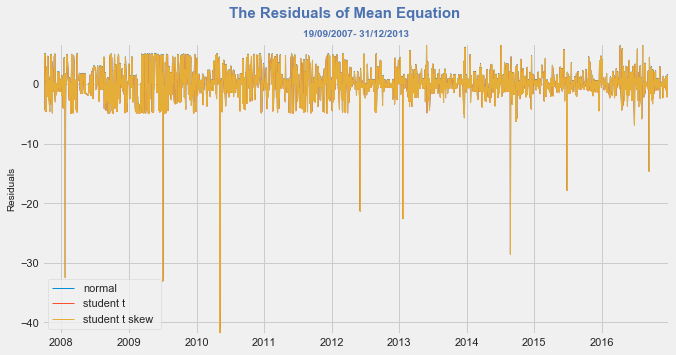

In [51]:
fig=plt.figure(figsize=(10,5))
plt.plot(results_norm.resid,LineWidth=1,label='normal')
plt.plot(results_standT.resid,LineWidth=1,label='student t ')
plt.plot(results_standST.resid,LineWidth=1,label='student t skew ')
plt.autoscale(enable=True,axis='both',tight=True)
#plt.grid(linestyle=':',which='both',linewidth=2)
fig.suptitle('The Residuals of Mean Equation', 
             fontsize=15,fontweight='bold',
            color='b')
plt.title('19/09/2007- 31/12/2013',fontsize=10,
          fontweight='bold',color='b')
plt.ylabel('Residuals',fontsize=10,color='k')
plt.legend()

## Conditional volatility

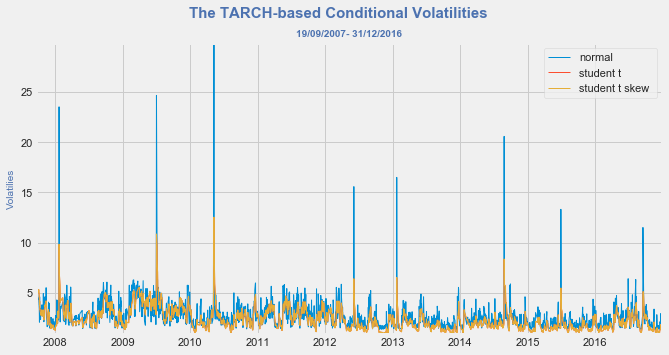

In [50]:
fig=plt.figure(figsize=(10,5))
plt.plot(results_norm.conditional_volatility,LineWidth=1,
        label='normal')
plt.plot(results_standT.conditional_volatility,LineWidth=1,
        label='student t ')
plt.plot(results_standST.conditional_volatility,LineWidth=1,
        label='student t skew ')
plt.autoscale(enable=True,axis='both',tight=True)
#plt.grid(linestyle=':',which='both',linewidth=2)
fig.suptitle('The TARCH-based Conditional Volatilities', 
             fontsize=15,fontweight='bold',
            color='b')
plt.title('19/09/2007- 31/12/2016',fontsize=10,
          fontweight='bold',color='b')
plt.ylabel('Volatilies',fontsize=10,color='b')
plt.legend()

## Residuals standardized by conditional volatility

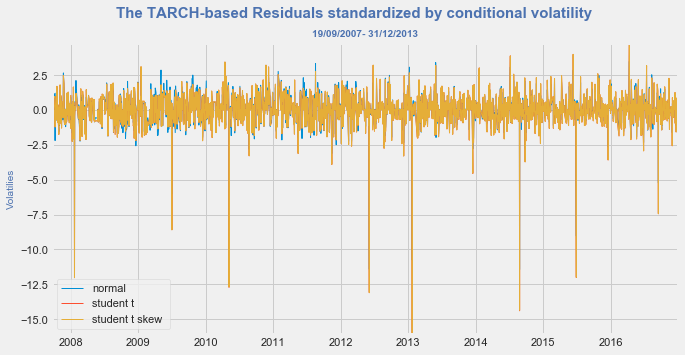

In [52]:
fig=plt.figure(figsize=(10,5))
plt.plot(results_norm.std_resid,LineWidth=1,label='normal')
plt.plot(results_standT.std_resid,LineWidth=1,label='student t ')
plt.plot(results_standST.std_resid,LineWidth=1,label='student t skew ')
plt.autoscale(enable=True,axis='both',tight=True)
#plt.grid(linestyle=':',which='both',linewidth=2)
fig.suptitle('The TARCH-based Residuals standardized by conditional volatility', 
             fontsize=15,fontweight='bold',
            color='b')
plt.title('19/09/2007- 31/12/2013',fontsize=10,
          fontweight='bold',color='b')
plt.ylabel('Volatilies',fontsize=10,color='b')
plt.legend()